# Linear Discriminant Analysis (on Iris Dataset) by Abhirup Nandy & Smriti Anand

 Here we load the IRIS dataset into a pandas dataframe named 'df' and the class label into a numpy-array 'label'

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns


data = load_iris()
df = pd.DataFrame(data.data)
label=data.target

df.columns=['seplen','sepwid','petlen','petwid']

df.head()

,seplen,sepwid,petlen,petwid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here we plot the IRIS data to with x Coordinate as Sepal Length and y coordinate as Sepal Width.



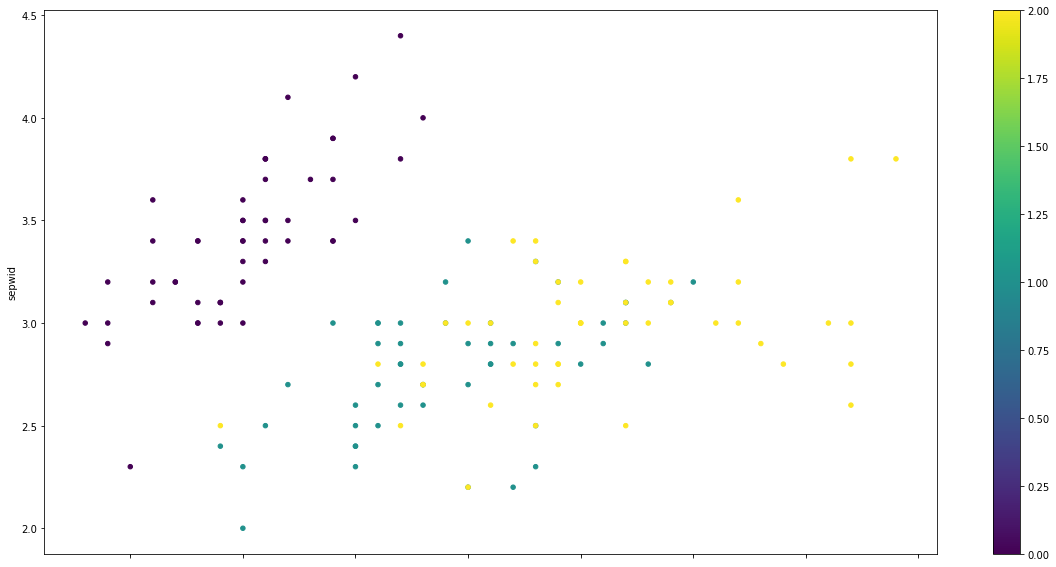

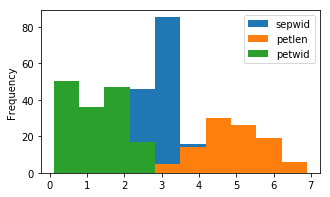

In [2]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

df.plot.scatter(x=0,y=1,c=label,colormap='viridis')

plt.rcParams['figure.figsize'] = [5,3]
df.plot.hist(x=0)

#fig = plt.figure(figsize=(20,10))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D(df.seplen, df.sepwid, df.petlen,c=label)
##sf = ax.get_figure()
##sf.savefig("foo.png")

We see that the data can be linearly separable into 2 classes, but not 3.

Now we compute the 4-dimentional mean vectors ( 4 dimentions = 4 parameters ) and Dataset Mean

In [3]:
import numpy as np

mean_vec = df.groupby(by=label).mean().apply(list)
mean_vec = np.array(mean_vec)
#DATA MEAN for IRIS dataset
iris_mean = mean_vec.mean(axis=0)


Between - Class Covariance Matrix

In [4]:
b_mean=[]
for i in range(3):
    b_mean.append(iris_mean - mean_vec[i])
b_mean = np.array(b_mean)

Sb=[]
for i in range(3):
    Sb.append(np.dot(b_mean[i][np.newaxis].T, b_mean[i][np.newaxis]))
Sb = np.array(Sb)  #Class-wise Covariance Matrix
Sb_iris = Sb.sum(axis=0)
Sb_iris  #Between Class Covariance Matrix

array([[ 1.26424267, -0.39068   ,  3.30329333,  1.42726133],
       [-0.39068   ,  0.219552  , -1.121104  , -0.449848  ],
       [ 3.30329333, -1.121104  ,  8.73287467,  3.73816267],
       [ 1.42726133, -0.449848  ,  3.73816267,  1.61208267]])

Within Class Covariance Matrix

In [5]:
sc_mat1 = np.zeros((4,4))
sc_mat2 = np.zeros((4,4))
sc_mat3 = np.zeros((4,4))
for i in range(50):
    class1_row=np.array(df.iloc[i])
    class1_row.reshape(4,1)
    mean_vec[0].reshape(4,1)
    var_class1 = class1_row - mean_vec[0]
    sc_mat1 += np.dot(var_class1[np.newaxis].T , var_class1[np.newaxis])
    
    class2_row=np.array(df.iloc[50+i])
    class2_row.reshape(4,1)
    mean_vec[1].reshape(4,1)
    var_class2 = class2_row - mean_vec[1]
    sc_mat2 += np.dot(var_class2[np.newaxis].T , var_class2[np.newaxis])
    
    class3_row=np.array(df.iloc[100+i])
    class3_row.reshape(4,1)
    mean_vec[2].reshape(4,1)
    var_class3 = class3_row - mean_vec[2]
    sc_mat3 += np.dot(var_class3[np.newaxis].T , var_class3[np.newaxis])

Sw_iris = sc_mat1+sc_mat2 + sc_mat3
 
Sw_iris #Within Class Covariance Matrix

array([[38.9562, 13.683 , 24.614 ,  5.6556],
       [13.683 , 17.035 ,  8.12  ,  4.9132],
       [24.614 ,  8.12  , 27.22  ,  6.2536],
       [ 5.6556,  4.9132,  6.2536,  6.1756]])

Solving the generalized eigenvalue problem for the matrix $S_{W}^{-1}S_B$

In [6]:
ei_val,ei_vec = np.linalg.eigh(np.dot(np.linalg.inv(Sw_iris),Sb_iris))

def takeSecond(elem):
    return elem[0]

#ei_pairs =[(np.abs(ei_val[i]), ei_vec[:,i]) for i in range(len(ei_val))]
ei_pair=[[ei_val[i], ei_vec[i]] for i in range(len(ei_val))]
ei_pair.sort(key=takeSecond,reverse=True)
print(ei_pair)

[[0.9815759037326377, array([-0.73962376,  0.22908315,  0.04900146,  0.63093301])], [0.07235097283123765, array([ 0.50890581, -0.40027793,  0.24019528,  0.72325561])], [-0.1426899300319427, array([ 0.08952333,  0.43033621,  0.89010784, -0.12043398])], [-0.2602464532605347, array([ 0.43122748,  0.77595698, -0.38420452,  0.25361489])]]


Selecting top k-eigenvectors

In [7]:
opt_w = np.hstack((ei_pair[0][1].reshape(4,1),(ei_pair[1][1].reshape(4,1))))
opt_w

array([[-0.73962376,  0.50890581],
       [ 0.22908315, -0.40027793],
       [ 0.04900146,  0.24019528],
       [ 0.63093301,  0.72325561]])

Projecting data onto k- dimentions

In [8]:
type1 = [[0 for x in range(50)] for y in range(4)]
type2 = [[0 for x in range(50)] for y in range(4)]
type3 = [[0 for x in range(50)] for y in range(4)]


for i in range(50):
    type1[0][i]=df.iloc[i][0]
    type1[1][i]=df.iloc[i][1]
    type1[2][i]=df.iloc[i][2]
    type1[3][i]=df.iloc[i][3]
    
    type2[0][i]=df.iloc[50+i][0]
    type2[1][i]=df.iloc[50+i][1]
    type2[2][i]=df.iloc[50+i][2]
    type2[3][i]=df.iloc[50+i][3]
    
    type3[0][i]=df.iloc[100+i][0]
    type3[1][i]=df.iloc[100+i][1]
    type3[2][i]=df.iloc[100+i][2]
    type3[3][i]=df.iloc[100+i][3]

class1_opt = np.dot(np.transpose(type1),opt_w)
class2_opt = np.dot(np.transpose(type2),opt_w)
class3_opt = np.dot(np.transpose(type3),opt_w)
#print(class1_opt,class2_opt,class3_opt)

Plotting the scatter-plot for the 2-dimentional data

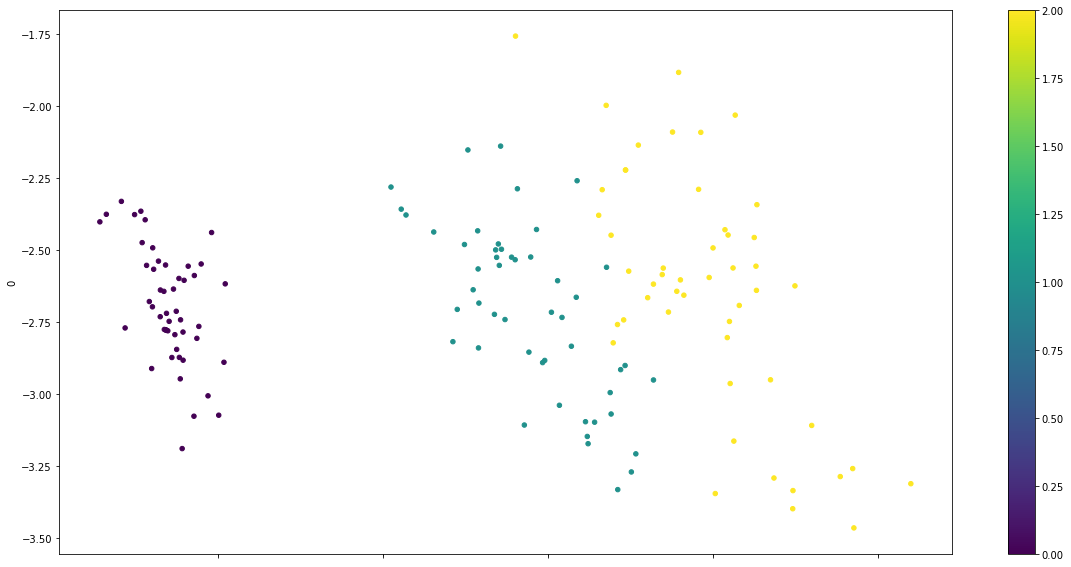

In [11]:
list1= [class1_opt[:,0],class1_opt[:,1]]
list1=np.array(list1).T.tolist()
list2= [class2_opt[:,0],class2_opt[:,1]]
list2=np.array(list2).T.tolist()
list3= [class3_opt[:,0],class3_opt[:,1]]
list3=np.array(list3).T.tolist()
list1.extend(list2)
list1.extend(list3)

list1 =pd.DataFrame(list1)

plt.rcParams['figure.figsize'] = [20, 10]
list1.plot.scatter(x=1,y=0,c=label,colormap='viridis')